<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Clustering/blob/master/(_CLUSTERING_)_KMeans_Aplica%C3%A7%C3%A3o_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

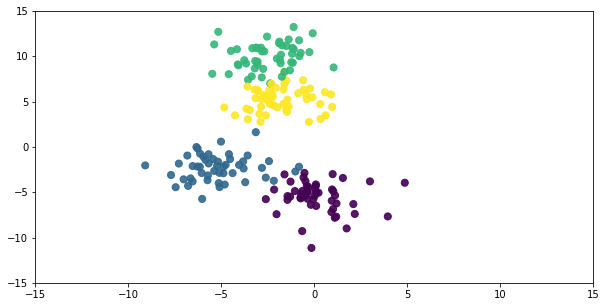

In [10]:
# Importar as bibliotecas básicas
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

# Número de Clusters
k = 4

# Número de Pontos
n = 200

dados = make_blobs( n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)

# Atributos das observações
X = dados[0]

# Classe conhecida inicialmente
labels = dados[1]

# Mostrar os dados
plt.scatter( X[ : , 0 ], X[ :, 1 ], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim( -15, 15 )
plt.ylim( -15, 15 )
plt.show()

# **KMeans**

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Dados Originais')

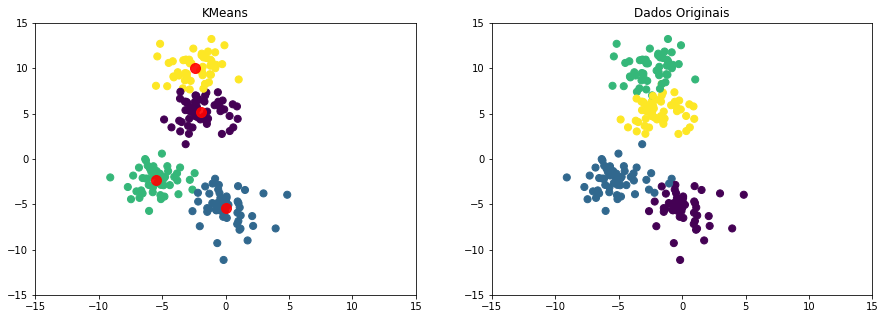

In [16]:
from sklearn.cluster import KMeans

# Define o método com k clusters
kmeans = KMeans( n_clusters=k )

# Realiza o treinamento considerando as features (X)
kmeans.fit( X )

# Faz a predição, identificando os clusters
y_kmeans = kmeans.fit_predict( X )

# Define o tamanho da figura
plt.figure( figsize=(15,5) )

# Mostra o primeiro gráfico
plt.subplot( 1, 2, 1 )
plt.scatter( X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.xlim( -15, 15 )
plt.ylim( -15, 15 )
plt.title( 'KMeans' )

centers = kmeans.cluster_centers_

# Mostra os centróides obtidos
plt.scatter( centers[ :, 0 ], centers[ :, 1 ], c='red', s=100, alpha=0.9 )

# Mostra o segundo gráfico
plt.subplot( 1, 2, 2 )
plt.scatter( X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.xlim( -15, 15 )
plt.ylim( -15, 15 )
plt.title( 'Dados Originais' )

Podemos estimar o número ideal de clusters utilizando o método do cotovelo (**elbow method**), esse método é utilizado para encontrar o melhor valor de **k**.

In [ ]:
WSS = []

K = range( 1, 10 )
# Considerando diversos valores de k
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit( X )

  # Calcula a medida e armazena em uma lista
  WSS.append( kmeans.inertia_ )

# Mostrar os resultados
plt.figure( figsize=(10,5))
plt.plot( K, WSS, '-bo' )
plt.xlabel( 'k' )
plt.ylabel( 'WSS' )
plt.title( 'Método de Elbow' )
plt.show()

No algorítmo **K-means**, o agrupamento depende da posição inicial das "**sementes**", conforme vemos abaixo. No entanto a implementação do **scikit-learn** usa um método para otimizar a posição inicial das sementes, de modo que o usuário não precisa se preocupar com esse detalhe. O **centro** de cada cluster é mostrado em **vermelho** nos gráficos abaixo.

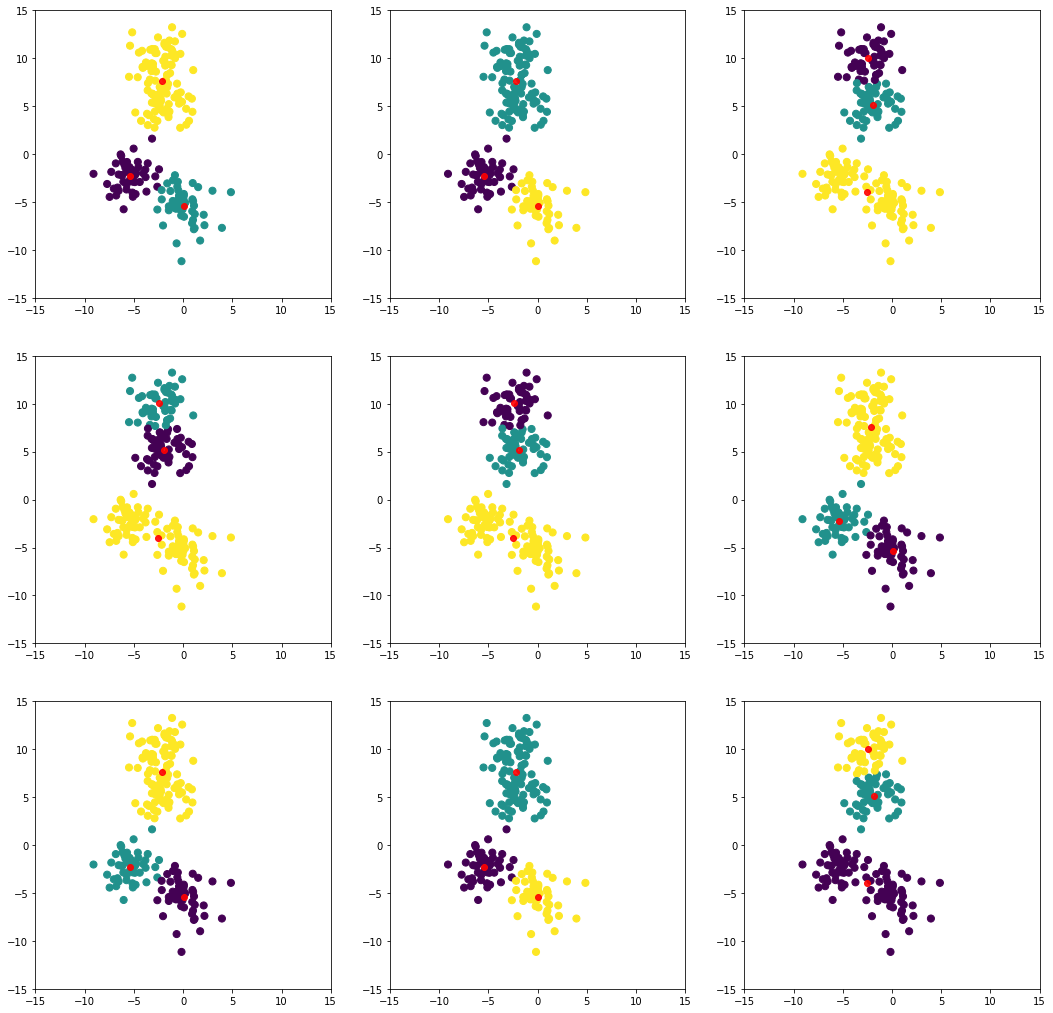

In [18]:
from sklearn.cluster import KMeans

# Número de clusters
k = 3

plt.figure( figsize=(18,18))

# Mostra 9 execuções diferentes do algorítimo no mesmo conjunto de dados
for s in np.arange( 1, 10 ):
  kmeans = KMeans( n_clusters=k, init='random', n_init=1 )
  kmeans.fit( X )
  y_kmeans = kmeans.fit_predict( X )

  plt.subplot( 3, 3, s )
  plt.scatter( X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
  
  centers = kmeans.cluster_centers_
  plt.scatter( centers[ : , 0 ], centers[ :, 1], c='red', alpha=0.9 )
  plt.xlim( -15, 15 )
  plt.ylim( -15, 15 )
plt.show()


## **identificação de clusters mesmo em dados aleatórios**

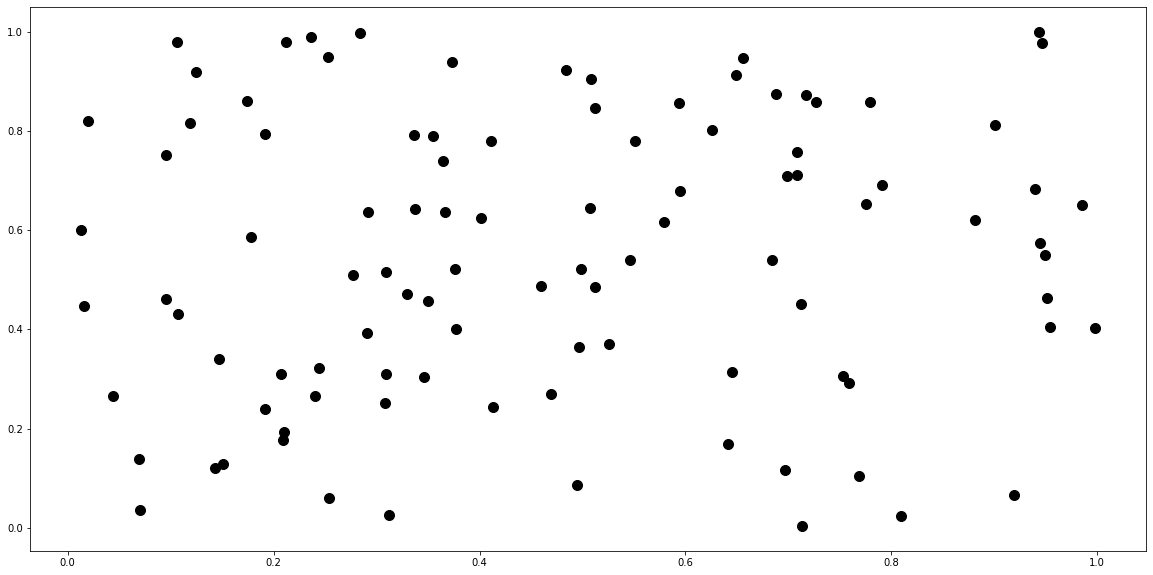

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure( figsize=(20,10))

X = np.random.rand( 100, 2 )

plt.scatter( X[ :, 0 ], X[ :, 1 ], c='black', s=100 )
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


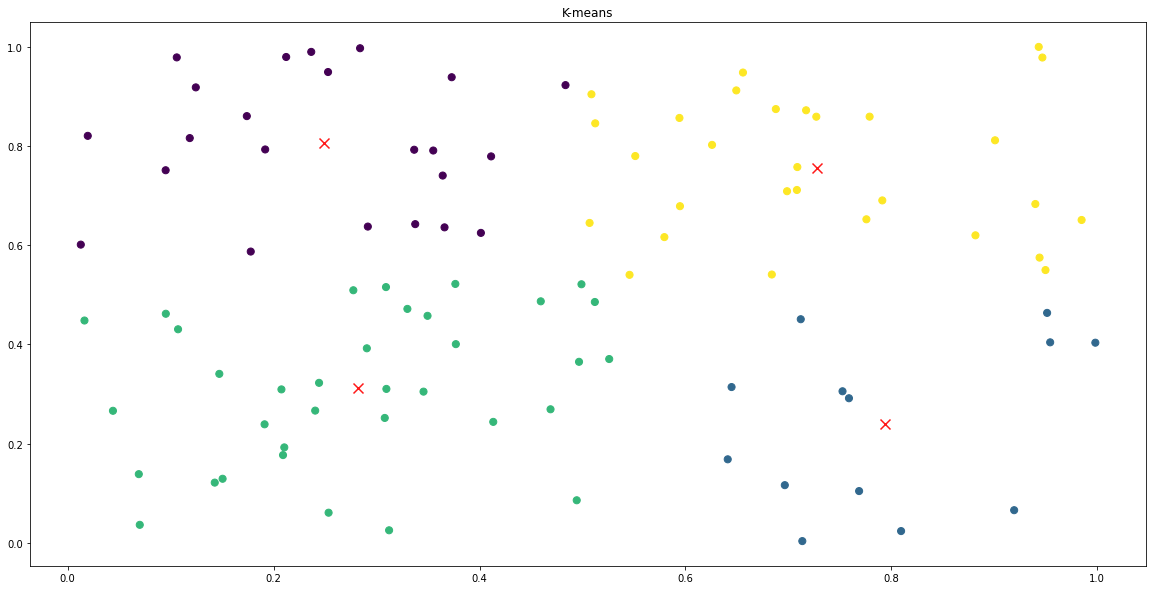

In [34]:
k = 3
kmeans = KMeans( n_clusters = 4 )
kmeans.fit( X )
y_kmeans = kmeans.fit_predict( X )

plt.figure( figsize=(20,10))
plt.scatter( X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50 )

centers = kmeans.cluster_centers_
plt.scatter( centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9, marker='x')
plt.title( 'K-means' )
plt.show()

